In [616]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [618]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [621]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect,func
from datetime import datetime, timedelta

In [623]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [625]:
# reflect an existing database into a new model
#Declare a Base using `automap_base()`
Base = automap_base()
# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [627]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [629]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [631]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [633]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [636]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [638]:
# Find the last date in the data set.
session.query(Measurement.date).order_by(Measurement.date.asc()).first()

('2010-01-01',)

In [640]:
Most_recent_date = '2017-08-23'
Last_date = '2010-01-01'

In [642]:
most_recent_date_dt = dt.datetime.strptime(Most_recent_date, '%Y-%m-%d')
last_date_dt = dt.datetime.strptime(Last_date, '%Y-%m-%d')

In [644]:
print(most_recent_date_dt)

2017-08-23 00:00:00


In [646]:
print(last_date_dt)

2010-01-01 00:00:00


In [648]:
# Calculate a time difference 1 year ago from the last date
year_ago = most_recent_date_dt - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [650]:
formatted_year_ago = year_ago.strftime('%Y-%m-%d')
print(formatted_year_ago)

2016-08-23


In [652]:
# Perform a query to retrieve the data and precipitation scores
# Dates from 2017-08-23 and 2016-08-23
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
        order_by(Measurement.date).all()




In [662]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Convert the query results to a Pandas DataFrame and set column names
precip_df = pd.DataFrame(query, columns=['Date', 'Precipitation'])

print(precip_df)

            Date  Precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
3     2016-08-23            NaN
4     2016-08-23           0.02
...          ...            ...
2225  2017-08-22           0.50
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2228  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [664]:
# Sort the dataframe by date
precip_df = precip_df.sort_values(by='Date')
print(precip_df)

            Date  Precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
3     2016-08-23            NaN
4     2016-08-23           0.02
...          ...            ...
2225  2017-08-22           0.50
2228  2017-08-23           0.08
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [666]:
#Convert mm to inches
precip_df['Inches'] = precip_df['Precipitation'] * 0.0393701

In [668]:
# Ensure the Date column is in datetime format
precip_df['Date'] = pd.to_datetime(precip_df['Date'])

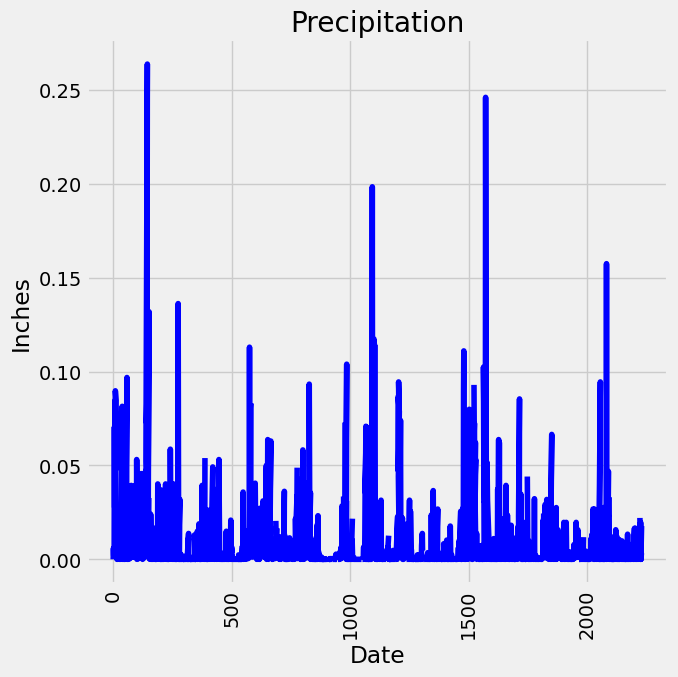

In [660]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plotting Precipitation in Inches as a line plot over time

precip_df['Inches'].plot(
    kind='line', 
    figsize=(7, 7), 
    title="Precipitation", 
    xlabel="Date", 
    ylabel="Inches", 
    color='blue'
)


plt.xticks(rotation=90)
plt.tight_layout() #make smaller (tighter)

plt.show()

In [511]:
#*** ANSWERS ABOVE ***


# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [513]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precip_df['Precipitation'].describe()
summary_stats_df = pd.DataFrame(summary_stats)

print(summary_stats_df)

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [516]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(total_stations)

9


In [518]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for station, count in most_active_stations:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [575]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature

In [577]:
most_active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first() #using .all returned too man

if most_active_stations:
    most_active_station_id = most_active_stations.station

    temperature_stats = session.query(
        func.min(Measurement.tobs).label('min_temp'),
        func.max(Measurement.tobs).label('max_temp'),
        func.avg(Measurement.tobs).label('avg_temp')
    ).filter(Measurement.station == most_active_station_id).all()

    if temperature_stats:
        min_temp, max_temp, avg_temp = temperature_stats[0]
        print(f"Lowest Temperature: {min_temp}")
        print(f"Highest Temperature: {max_temp}")
        print(f"Average Temperature: {avg_temp:.2f}")


Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66


In [579]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [581]:
# Calculate the date one year ago from the most recent date in the dataset
latest_date = session.query(func.max(Measurement.date)).scalar()

In [583]:
latest_date = datetime.strptime(latest_date, '%Y-%m-%d').date()

In [585]:
year_ago_date = latest_date - timedelta(days=365)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


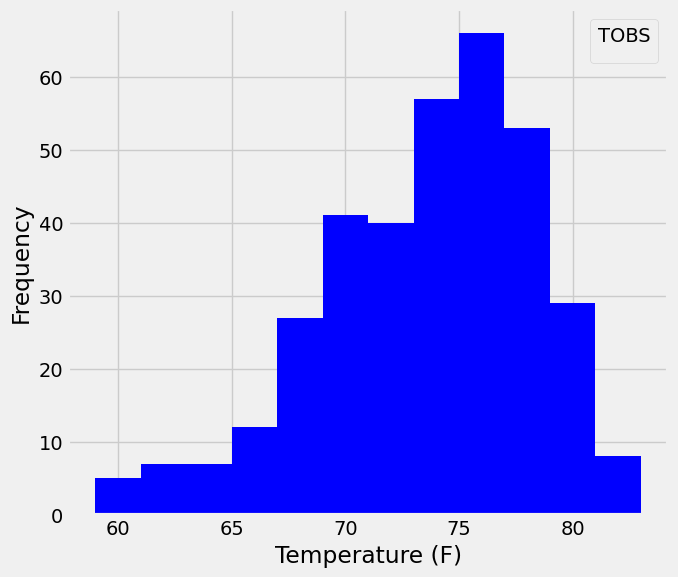

In [605]:
# Query the last 12 months of temperature observation data for the most active station
query = session.query(Measurement.tobs).filter(
    Measurement.station == most_active_station_id,
    Measurement.date >= year_ago_date
).all()

# Make into a Pandas DataFrame
temp_df = pd.DataFrame(query, columns=['Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(7, 6))
plt.hist(temp_df['Temperature'], bins=12, color='blue')
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend(title="TOBS")
plt.tight_layout()  # make the plot tighter

# Show the plot
plt.show()

# Close Session

In [670]:
# Close Session
session.close()